# Pymaceuticals Inc.
---

### Analysis

    • Ramicane exhibited the lowest mean tumor volume of 40.216745 mm3 among the 10 drug regimens, followed closely by Capomulin with a mean volume of 40.675741 mm3. These two regimens also had the lowest median, variance, standard deviation, and standard error. They showed less variability and provided more precise estimates compared to other regimens.
    
    • In terms of tumor volume, Ramicane and Capomulin were more effective than other treatments. Although Ramicane had a slight edge, both regimens could be good options for reducing tumor size, when compared to other treatment regimens.
    
    • Capomulin and Ramicane had the highest number of observations (bar plot showing number of rows Mouse ID/Timepoints), indicating closer monitoring of mice receiving these treatments, when compared to the other treatment regimens.
    
    • The distribution of male and female mice was almost equal, with males accounting for 51% and females for 49% of the total, indicating minimal gender bias in the data.
    
    • Ramicane and Capomulin resulted in smaller tumor volumes compared to other drug regimens, as shown by the box plots. Infubinol showed one potential outlier, indicating perhaps an error in the data collection of that treatment regimen.
    
    • In the Capomulin Regimen, there was a positive correlation between mouse weight and average tumor volume. The correlation coefficient of 0.84 indicated a strong correlation, suggesting that tumor volume tends to increase with mouse weight.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_mouse_study_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = df_mouse_study_data[("Mouse ID")].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_mouse_study_data[df_mouse_study_data.duplicated(
                                                            subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Find duplicate Mouse ID numbers
df_duplicate_data = df_mouse_study_data[df_mouse_study_data["Mouse ID"] == "g989"]
df_duplicate_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_to_remove = "g989"
df_clean_mouse_study_data = df_mouse_study_data.drop(
    df_mouse_study_data[df_mouse_study_data["Mouse ID"] == mouse_id_to_remove].index)
df_clean_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_total_mice = df_clean_mouse_study_data[("Mouse ID")].nunique()
updated_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# group the data by "Drug Regimen"
grouped_data = df_clean_mouse_study_data.groupby("Drug Regimen")

# create a dictionary with empty lists for each column
summary_stats = {
    'Mean Tumor Volume': [],
    'Median Tumor Volume': [],
    'Tumor Volume Variance': [],
    'Tumor Volume Std. Dev.': [],
    'Tumor Volume Std. Err.': [],
}

# iterate through each regimen group
for regimen_name, regimen_data in grouped_data:
    # calculate the required values for the current regimen group
    avg_tumor_vol = regimen_data["Tumor Volume (mm3)"].mean()
    med_tumor_vol = regimen_data["Tumor Volume (mm3)"].median()
    var_tumor_vol = regimen_data["Tumor Volume (mm3)"].var()
    std_tumor_vol = regimen_data["Tumor Volume (mm3)"].std()
    sem_tumor_vol = regimen_data["Tumor Volume (mm3)"].sem()

    # append the values to the respective columns in the data dictionary
    summary_stats['Mean Tumor Volume'].append(avg_tumor_vol)
    summary_stats['Median Tumor Volume'].append(med_tumor_vol)
    summary_stats['Tumor Volume Variance'].append(var_tumor_vol)
    summary_stats['Tumor Volume Std. Dev.'].append(std_tumor_vol)
    summary_stats['Tumor Volume Std. Err.'].append(sem_tumor_vol)

# create the dataframe using the data dictionary
df_per_regimen_summary_1 = pd.DataFrame(summary_stats, index=grouped_data.groups.keys())

# sort the dataframe by index (Drug Regimen)
df_per_regimen_summary_1 = df_per_regimen_summary_1.sort_index()

# display the summary dataframe
df_per_regimen_summary_1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Perform the groupby operation and apply the aggregation functions using a dictionary comprehension, 
# where the key is the metric name "Tumor Volume (mm3)"" and the value is a list of 
# aggregation functions ('mean', 'median', 'var', 'std', 'sem')
df_per_regimen_summary_2 = df_clean_mouse_study_data.groupby("Drug Regimen").agg({
    metric: ['mean', 'median', 'var', 'std', 'sem'] for metric in ['Tumor Volume (mm3)']
})

# Display the summary statistics
df_per_regimen_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

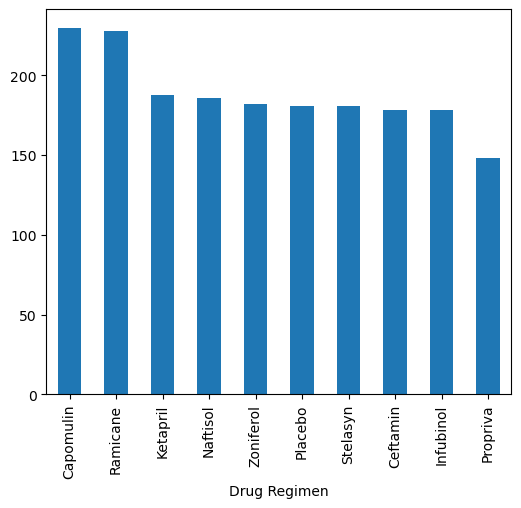

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# create df containing each Drug Regimen by count of timepoints
df_per_regimen_timepoint = df_clean_mouse_study_data.groupby("Drug Regimen").agg(Count_Timepoint=('Timepoint', 'count'))

# sort df by count_timepoint in descending order
df_per_regimen_timepoint = df_per_regimen_timepoint.sort_values(by='Count_Timepoint', ascending=False)

# set x axis as Drug Regimen names
x_axis = df_per_regimen_timepoint.index

# create a bar chart of the data, adjusting the size of the chart and excluding the legend
df_per_regimen_timepoint.plot(kind="bar", figsize=(6,5), legend=False)
plt.show()

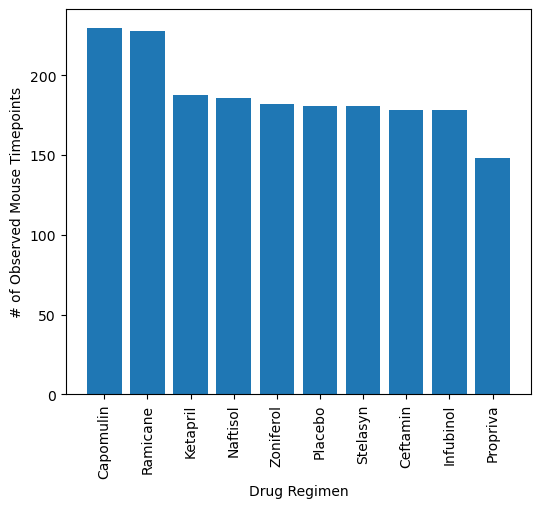

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# create df containing each Drug Regimen by count of timepoints
df_per_regimen_timepoint = df_clean_mouse_study_data.groupby("Drug Regimen").agg(Count_Timepoint=('Timepoint', 'count'))

# sort df by count_timepoint in descending order
df_per_regimen_timepoint = df_per_regimen_timepoint.sort_values(by='Count_Timepoint', ascending=False)

# set x axis as Drug Regimen names and y axis as count_timepoint
x_axis = df_per_regimen_timepoint.index
y_axis = df_per_regimen_timepoint["Count_Timepoint"]

# assign ticks for each drug regimen name
tick_locations = [s for s in x_axis]

# create bar chart, adjusting width and height, center the chart, add labels to x and y axis
plt.figure(figsize=(6,5))
plt.bar(x_axis, y_axis, align="center")
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

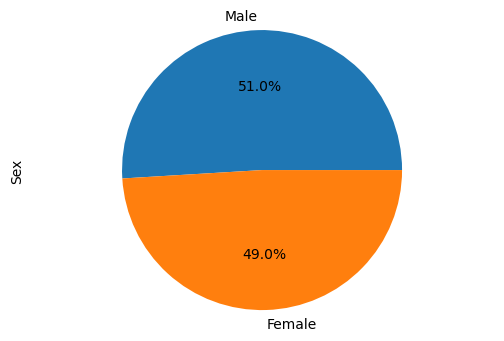

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# create df containing each gender by count gender
df_gender = df_clean_mouse_study_data.groupby("Sex").agg(Count_Gender=('Sex', 'count'))

# sort df by count_gender in descending order
df_gender = df_gender.sort_values(by='Count_Gender', ascending=False)

# make sex the index
sex = df_gender.index

# generate pie chart based count_gender, adjusting chart size, leave out legend and format precentage label to 1 decimal place
df_gender_pie = df_gender.plot(kind="pie", y='Count_Gender',figsize=(6, 4), legend=False, autopct="%1.1f%%")

# make y label "Sex"
df_gender_pie.set_ylabel("Sex")

# create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

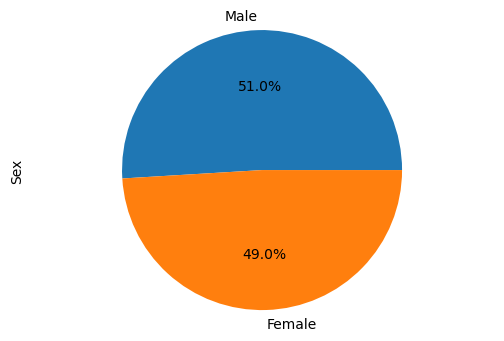

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create df containing each gender by count gender
df_gender = df_clean_mouse_study_data.groupby("Sex").agg(Count_Gender=('Sex', 'count'))

# sort df by count_gender in descending order
df_gender = df_gender.sort_values(by='Count_Gender', ascending=False)

# make sex the index
sex = df_gender.index

# create variable Count_Gender
count = df_gender['Count_Gender']

# adjust size of chart
plt.figure(figsize=(6, 4))

# create pie chart based on count data, labels to show sex, percentage label to 1 decimal place
plt.pie(count, labels=sex, autopct="%1.1f%%")

# make y label "Sex"
plt.ylabel("Sex")

# create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

### Assistance from AskBCS Learning Assistant on this step###

# calculate the final timepoint for each mouse ID in df_clean_mouse_study_data
max_timepoints = df_clean_mouse_study_data.groupby(["Mouse ID"])["Timepoint"].max()
# the index of the df is reset
max_timepoints = max_timepoints.reset_index()    

# merge max_timepoints with the df_clean_mouse_study_data to get the tumor volume at the last timepoint
max_timepoint_data = max_timepoints.merge(df_clean_mouse_study_data, on=["Mouse ID", "Timepoint"],how = "left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

### Assistance from AskBCS Learning Assistant on this step###

# create variable for specified regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# iterate over each regimen
for regimen in regimens:
    # filter the data for the current regimen
    regimen_data = max_timepoint_data[max_timepoint_data["Drug Regimen"] == regimen] 
       
    # Get the tumor volumes for the maximum final timepoint and append them to the list
    tumor_volumes = regimen_data["Tumor Volume (mm3)"]
    tumor_volume_list.append(tumor_volumes)

## calculate the IQR and quantitatively determine if there are any potential outliers for each drug regimen ##
# create variable for specified regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# iterate over each regimen
for regimen in regimens:
    # filter the data for the current regimen
    regimen_data = max_timepoint_data[max_timepoint_data["Drug Regimen"] == regimen]
    # create variable tumor_volumes to use to calculate outliers
    tumor_volumes = regimen_data["Tumor Volume (mm3)"]
    
    # set quartiles and interquartile range
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # calculate lower and upper bounds for each regimen
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # find outliers in each drug regimen based on lower and upper bounds calculated above
    potential_outliers = tumor_volumes.loc[
        (tumor_volumes < lower_bound) | 
        (tumor_volumes > upper_bound)]
    
    # print any outliers for each regimen, showing the index value and the respective outlier Tumor Volume (mm3)
    print(f"{regimen}'s potential outliers:",potential_outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


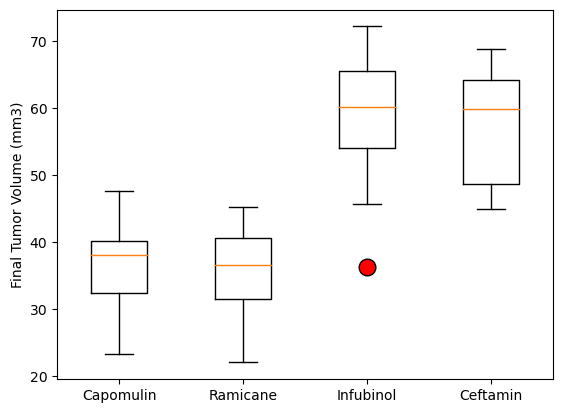

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a boxplot from the DataFrame

# create boxplot using tumor_volume_list data, x labels to be regimens, outlier marker to be o with red inside and size 12.
plt.boxplot(tumor_volume_list, labels=regimens, 
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})

# add the y-axis label
plt.ylabel("Final Tumor Volume (mm3)")

# remove the grid lines
plt.grid(False)

plt.show()

## Line and Scatter Plots

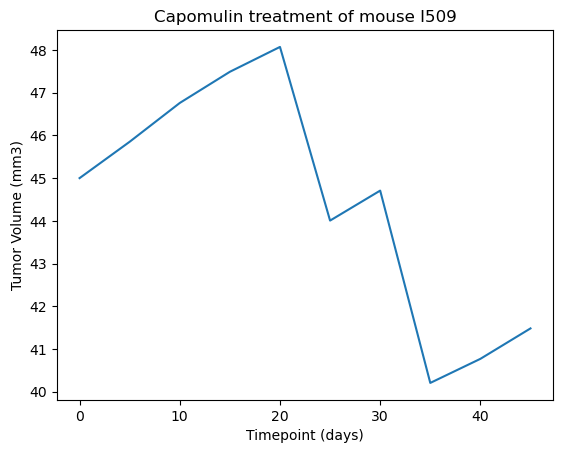

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# create df filtering df_clean_mouse_study_data to only mouse id "l509"
df_mouse_ID_l509= df_clean_mouse_study_data[df_clean_mouse_study_data["Mouse ID"] == "l509"]

# create line chart using df_mouse_ID_l509 data
plt.plot(df_mouse_ID_l509["Timepoint"], df_mouse_ID_l509["Tumor Volume (mm3)"])

# add x axis for Timepoint (days)
plt.xlabel("Timepoint (days)")

# add y axis Tumor Volume (mm3)
plt.ylabel("Tumor Volume (mm3)")

# add title "Capomulin treatment of mouse I509"
plt.title("Capomulin treatment of mouse I509")
plt.show()

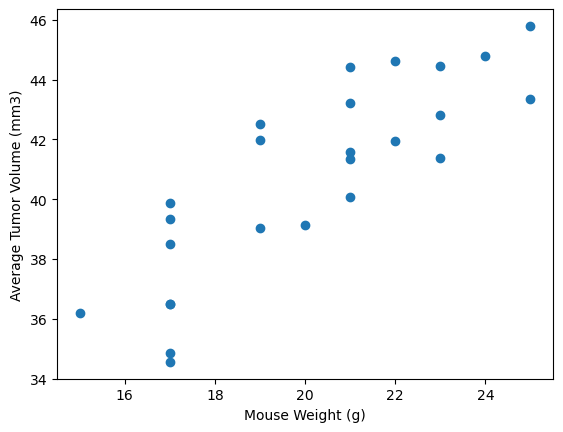

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# filter df_clean_mouse_study_datadataframe to Capomulin only data
capomulin_data = df_clean_mouse_study_data[df_clean_mouse_study_data["Drug Regimen"] == "Capomulin"]

# calculate average tumor volume per mouse id
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# calculate mouse weight for each mouse id
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# create scatterplot based on mouse_weight vs avg_tumor_volume
plt.scatter(mouse_weight, avg_tumor_volume)

# add x axis label "Mouse Weight (g)"
plt.xlabel("Mouse Weight (g)")

# add y axis label "Average Tumor Volume (mm3)"
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


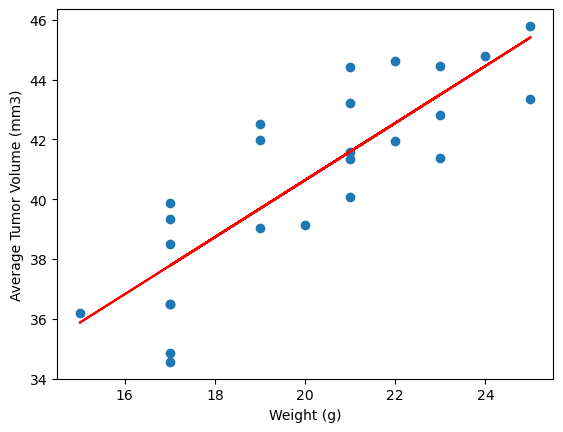

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as stats

# calculate the correlation coefficient based on mouse_weight vs avg_tumor_volume and format putput to 2 decimal places
correlation_coef, _ = stats.pearsonr(mouse_weight, avg_tumor_volume)
print("The correlation between mouse weight and the average tumor volume is {:.2f}".format(correlation_coef))

# perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(mouse_weight, avg_tumor_volume)

# create the regression line
regression_line = slope * mouse_weight + intercept

# Create the scatter plot based on mouse_weight vs avg_tumor_volume
plt.scatter(mouse_weight, avg_tumor_volume)

# add a red regression line to the chart
plt.plot(mouse_weight, regression_line, color="red")

# add x label "Weight (g)"
plt.xlabel("Weight (g)")

# add y label "Average Tumor Volume (mm3)"
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()